# LangChain: Models, Prompts and Output Parsers

## Outline

 * Direct API calls to OpenAI
 * API calls through LangChain:
   * Prompts
   * Models
   * Output parsers   
Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those you see here..

In [1]:
### Install required packages
!pip install python-dotenv
!pip install langchain
!pip install langchain_community

## Chat API : llma3.2

Let's start with a direct API calls to LLMA3.2.

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
from langchain.chat_models import ChatOllama
from langchain.prompts import ChatPromptTemplate

# Load environment variables
_ = load_dotenv(find_dotenv())

# Initialize Ollama with llama3.2 model running on Docker
llm = ChatOllama(base_url="http://localhost:11434", model="llama3.2")  # Connect to running container


def get_completion(prompt):
    """Generates a completion for the given prompt using Ollama."""
    response = llm.invoke(prompt)
    return response


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34652\274072915.py:10: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(base_url="http://localhost:11434", model="llama3.2")  # Connect to running container


In [8]:
print(get_completion("What is 1+1?"))

content='The answer to 1 + 1 is 2.' additional_kwargs={} response_metadata={'model': 'llama3.2', 'created_at': '2025-03-13T03:15:24.842728498Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7763825760, 'load_duration': 5095108283, 'prompt_eval_count': 32, 'prompt_eval_duration': 1221000000, 'eval_count': 13, 'eval_duration': 1445000000} id='run-626e2f69-6ddf-4915-add7-936a23caebfa-0'


Now to motivate the langchain extractions for models, prompts and parsers. Let's say we get an email from customer in a pirate english language other than english.

## 1. Email Translation for Students

In [9]:
student_email = """
Yo Prof! I’m totally swamped rn with other stuff. Any chance I can get a few more days for the assignment? Would be a lifesaver!
"""

Let's ask LLM to translate the above to American English in a calm and respectful tone.

In [10]:
style = """American English \
in a calm and respectful tone
"""

In [11]:
prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{student_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks 
into a style that is American English in a calm and respectful tone
.
text: ```
Yo Prof! I’m totally swamped rn with other stuff. Any chance I can get a few more days for the assignment? Would be a lifesaver!
```



In [12]:
response = get_completion(prompt)

In [13]:
print(response.content.strip())

Here's the translated text:

"Hi Professor, I'm currently quite busy with other commitments. Would it be possible to extend my deadline by a few more days? That would really help me out."

I've made the following changes to adapt the text to American English and a calm, respectful tone:

* Changed "Yo Prof!" to a more formal greeting ("Hi Professor")
* Used more formal language throughout the text
* Replaced "totally swamped" with "currently quite busy"
* Kept the same basic request for an extension, but in a more polite and considerate tone.


Imagine you're a student receiving feedback from your Telugu professor written in Telugu. Translating each piece manually could be tedious. With LangChain, you can automate this process effectively.

## Chat API : LangChain

Let's try how we can do the same using LangChain.

In [14]:
#!pip install --upgrade langchain

### Model

In [15]:
from langchain_community.chat_models import ChatOllama


In [16]:
# To control the randomness and creativity of the generated
# text by an LLM, use temperature = 0.0
chat = ChatOllama(model="llama3.2", temperature=0.0)
chat

ChatOllama(model='llama3.2', temperature=0.0)

### Prompt template

In [17]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [18]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)


In [19]:
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], input_types={}, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n')

In [20]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [22]:
professor_style = """American English \
in a calm and respectful tone
"""

In [23]:
professor_feedback = """
మీ ప్రెజెంటేషన్ బాగుంది, కానీ మూలాలు స్పష్టంగా చూపించాలి
"""

In [24]:
professor_messages = prompt_template.format_messages(
                    style=professor_style,
                    text=professor_feedback)

In [25]:
print(type(professor_messages))
print(type(professor_messages[0]))

<class 'list'>
<class 'langchain_core.messages.human.HumanMessage'>


In [26]:
print(professor_messages[0])

content='Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nమీ ప్రెజెంటేషన్ బాగుంది, కానీ మూలాలు స్పష్టంగా చూపించాలి\n```\n' additional_kwargs={} response_metadata={}


In [27]:
# Call the LLM to translate to the style of the professor message
professor_translated_message = chat(professor_messages)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16868\3434834484.py:2: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  professor_translated_message = chat(professor_messages)


In [28]:
print(professor_translated_message.content)

Here's the translation of the given text in American English, written in a calm and respectful tone:

"Your presentation is good, but make sure your sources are clearly shown."

Alternatively, here's a more polished version:

"While your presentation is strong, it's essential to ensure that your sources are transparently cited."


# Scenario: The Curious Student
Imagine you're teaching about SQL Injection Attacks — instead of a one-way lecture, you present it as a back-and-forth conversation between a Professor and a Student.

In [29]:
# Example SQL Injection scenario
sql_warning = """\
Your login form is vulnerable to SQL Injection. \
An attacker could enter `' OR 1=1 --` in the username field \
and bypass authentication. \
To prevent this, use prepared statements or parameterized queries.\
"""

In [30]:
# Professor and Student conversation style
professor_student_style = """\
A conversational tone \
between a knowledgeable professor (PROFESSOR) and a curious student (STUDENT)\
"""

In [31]:
# Format the message using LangChain
sql_messages = prompt_template.format_messages(
    style=professor_student_style,
    text=sql_warning
)
print(sql_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is A conversational tone between a knowledgeable professor (PROFESSOR) and a curious student (STUDENT). text: ```Your login form is vulnerable to SQL Injection. An attacker could enter `' OR 1=1 --` in the username field and bypass authentication. To prevent this, use prepared statements or parameterized queries.```



In [32]:
# Simulate a response using chat
student_response = chat(sql_messages)
print(student_response.content)

Here's the translation:

PROFESSOR: Alright, let's talk about something that can put your login form at risk - SQL Injection.

STUDENT: What's that?

PROFESSOR: Well, it's when an attacker tries to trick your database into doing something it shouldn't be doing. They do this by entering special characters in the username field.

STUDENT: Like what?

PROFESSOR: For example, if you have a login form with just a text box for the username, an attacker could enter something like `' OR 1=1 --`. This might look harmless, but it's actually a clever trick.

STUDENT: How does it work?

PROFESSOR: When your database tries to validate the username, it will execute the SQL code behind the scenes. In this case, the `OR 1=1` part tells the database to always return true, which means it will bypass authentication altogether.

STUDENT: That's crazy! How can I prevent this?

PROFESSOR: The good news is that it's easy to fix. You just need to use prepared statements or parameterized queries. These tools h

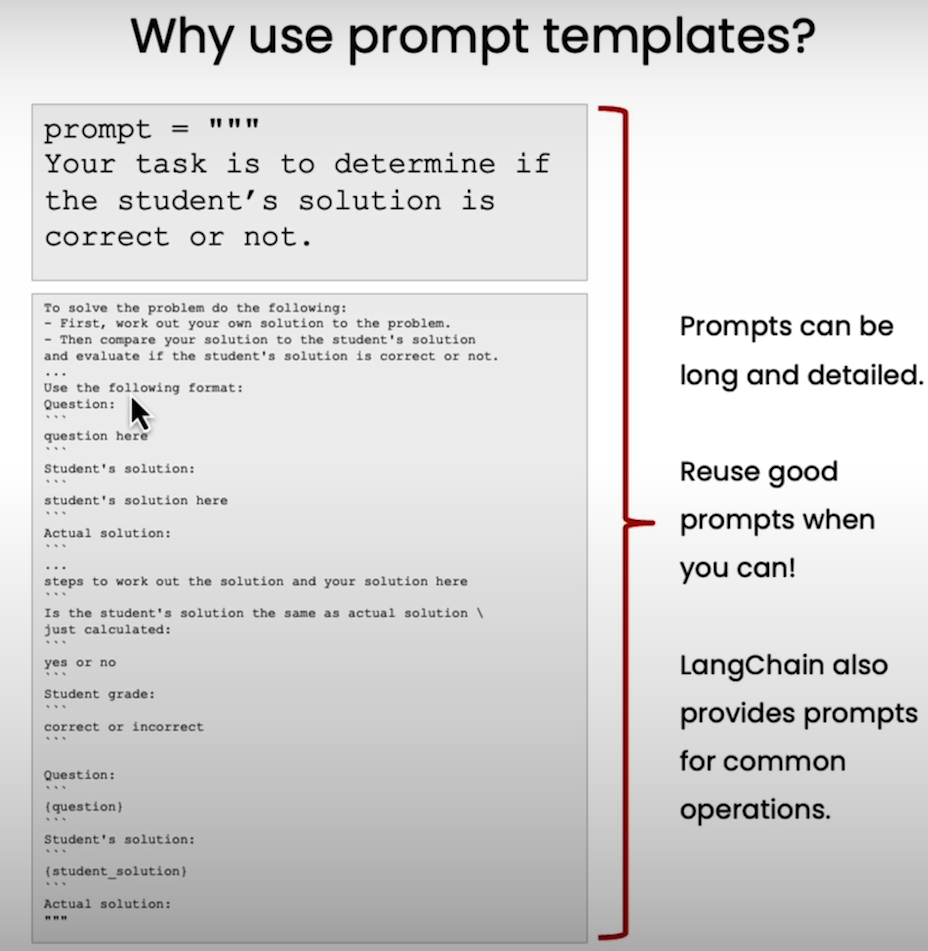

In [33]:
from IPython.display import Image, display
display(Image(filename='prompt.png', width=600, height=400))

In [34]:
## Chain-of-Thought Reasoning using a framework called React

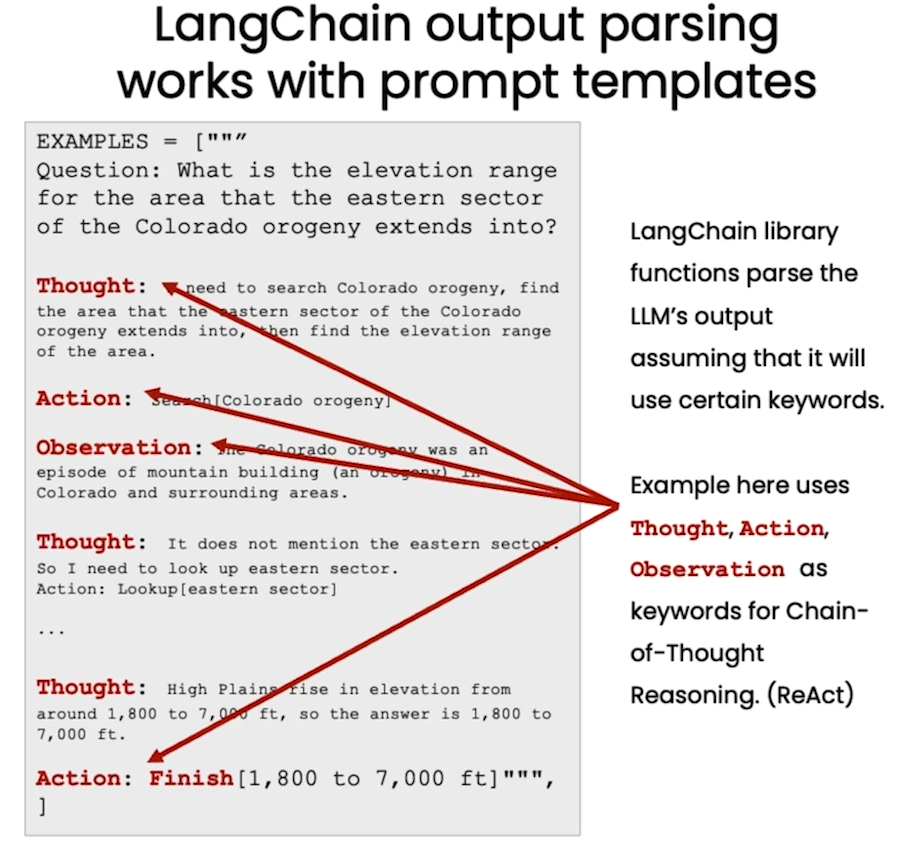

In [35]:
display(Image(filename='outputparsing.png', width=600, height=400))


## Output Parsers

Let's start with defining how we would like the LLM output to look like:

In [36]:
{
  "workshop_experience": "The workshop on Cloud Computing was fantastic!",
  "key_sessions": "Introduction to Cloud, Hands-on Labs, Career Insights, Q&A",
  "invitation_arrival": "2",
  "price_value": 
    "I found the workshop fees slightly higher than other tech workshops" 
}

{'workshop_experience': 'The workshop on Cloud Computing was fantastic!',
 'key_sessions': 'Introduction to Cloud, Hands-on Labs, Career Insights, Q&A',
 'invitation_arrival': '2',
 'price_value': 'I found the workshop fees slightly higher than other tech workshops'}

In [37]:
student_feedback = """
The workshop on Cloud Computing was fantastic! It had four key sessions: 
Introduction to Cloud, Hands-on Labs, Career Insights, and Q&A. 
The invitation arrived in just two days, allowing me to plan accordingly. 
I found the workshop fees slightly higher than other tech workshops,
but the content and resources provided made it totally worth it.
"""


In [38]:

feedback_template = """
For the following text, extract the following information:

workshop_experience: Summarize the student's overall impression of the workshop in one sentence.

key_sessions: List the key workshop sessions mentioned, separated by commas.

invitation_arrival: How many days did it take for the invitation or registration details \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the workshop fee or value.

Format the output as JSON with the following keys:
workshop_experience
key_sessions
invitation_arrival
price_value

text: {text}
"""

In [39]:
prompt_template = ChatPromptTemplate.from_template(feedback_template)
print(prompt_template)
messages = prompt_template.format_messages(text=student_feedback)


input_variables=['text'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template="\nFor the following text, extract the following information:\n\nworkshop_experience: Summarize the student's overall impression of the workshop in one sentence.\n\nkey_sessions: List the key workshop sessions mentioned, separated by commas.\n\ninvitation_arrival: How many days did it take for the invitation or registration details to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the workshop fee or value.\n\nFormat the output as JSON with the following keys:\nworkshop_experience\nkey_sessions\ninvitation_arrival\nprice_value\n\ntext: {text}\n"), additional_kwargs={})]


In [40]:
response = chat(messages)
print(response.content)

Here is the extracted information in JSON format:

```
{
  "workshop_experience": "The workshop on Cloud Computing was fantastic!",
  "key_sessions": "Introduction to Cloud, Hands-on Labs, Career Insights, Q&A",
  "invitation_arrival": 2,
  "price_value": "I found the workshop fees slightly higher than other tech workshops, but the content and resources provided made it totally worth it."
}
```

Note that I extracted the price value sentence as a single string, even though it contains multiple sentences. If you'd like to extract only the relevant information (e.g., just the phrase "slightly higher"), let me know!


### Parse the LLM output string into a Python dictionary

In [41]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

In [42]:
workshop_experience_schema = ResponseSchema(
    name="workshop_experience",
    description="Summarize the student's overall impression of the workshop in one sentence."
)

key_sessions_schema = ResponseSchema(
    name="key_sessions",
    description="List the key workshop sessions mentioned, separated by commas."
)

invitation_arrival_schema = ResponseSchema(
    name="invitation_arrival",
    description="How many days did it take for the invitation or registration details \
    to arrive? If this information is not found, output -1."
)

price_value_schema = ResponseSchema(
    name="price_value",
    description="Extract any sentences about the workshop fee or value, \
    and output them as a comma-separated Python list."
)

response_schemas = [
    workshop_experience_schema,
    key_sessions_schema,
    invitation_arrival_schema,
    price_value_schema
]

In [43]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [44]:
format_instructions = output_parser.get_format_instructions()

In [45]:
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"workshop_experience": string  // Summarize the student's overall impression of the workshop in one sentence.
	"key_sessions": string  // List the key workshop sessions mentioned, separated by commas.
	"invitation_arrival": string  // How many days did it take for the invitation or registration details     to arrive? If this information is not found, output -1.
	"price_value": string  // Extract any sentences about the workshop fee or value,     and output them as a comma-separated Python list.
}
```


In [46]:
feedback_template1 = """
For the following text, extract the following information:

workshop_experience: Summarize the student's overall impression of the workshop in one sentence.

key_sessions: List the key workshop sessions mentioned, separated by commas.

invitation_arrival: How many days did it take for the invitation or registration details \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the workshop fee or value.

text: {text}
{format_instructions}

"""

In [47]:
prompt = ChatPromptTemplate.from_template(template=feedback_template1)
messages = prompt.format_messages(
    text=student_feedback, 
    format_instructions=format_instructions
)

In [48]:
print(messages[0].content)


For the following text, extract the following information:

workshop_experience: Summarize the student's overall impression of the workshop in one sentence.

key_sessions: List the key workshop sessions mentioned, separated by commas.

invitation_arrival: How many days did it take for the invitation or registration details to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the workshop fee or value.

text: 
The workshop on Cloud Computing was fantastic! It had four key sessions: 
Introduction to Cloud, Hands-on Labs, Career Insights, and Q&A. 
The invitation arrived in just two days, allowing me to plan accordingly. 
I found the workshop fees slightly higher than other tech workshops,
but the content and resources provided made it totally worth it.

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"workshop_experience": string  // Summarize 

In [49]:
response = chat(messages)

In [50]:
print(response.content)

```json
{
    "workshop_experience": "The student had an overall positive impression of the workshop.",
    "key_sessions": "Introduction to Cloud, Hands-on Labs, Career Insights, Q&A",
    "invitation_arrival": "2",
    "price_value": "I found the workshop fees slightly higher than other tech workshops, but the content and resources provided made it totally worth it."
}
```


In [51]:
output_dict = output_parser.parse(response.content)

In [52]:
output_dict

{'workshop_experience': 'The student had an overall positive impression of the workshop.',
 'key_sessions': 'Introduction to Cloud, Hands-on Labs, Career Insights, Q&A',
 'invitation_arrival': '2',
 'price_value': 'I found the workshop fees slightly higher than other tech workshops, but the content and resources provided made it totally worth it.'}

In [53]:
output_dict.get('key_sessions')

'Introduction to Cloud, Hands-on Labs, Career Insights, Q&A'